In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

import calculations as calc

In [2]:
print(calc.calculate_pointwise_similarity.__doc__)


    Calculate point-wise similarity of all points on a map to a reference point over time

    Parameters:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, longitude, lattitude
        lon (int): Longitude of reference point
        lat (int): Latitude of reference point
        level (int): Level on which the similarity should be calculated
        simFunct (str): The similarity function that should be used.
            Default: Correlation Coefficient.
            Options: "corr": Correlation Coefficient, more will follow

    Returns:
        2 dimensional array with similarity values to reference point
    


In [3]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [5]:
#Choose a random point on the map
(lon, lat) = (np.random.randint(256), np.random.randint(512))
(lon, lat)

(200, 421)

In [6]:
#Define Level
level = 15

In [7]:
#Convert map in Array
map_array = np.array(nc.variables["u"][:, :, :, :])
map_array.shape

(12, 37, 256, 512)

In [10]:
#Calculate point-wise similarities to (lon, lat) (Here: Correlation Coefficient)
sim = calc.calculate_pointwise_similarity(map_array, lon, lat, level, sim_func="correlation")     
            
sim        

array([[0.39859496, 0.40301109, 0.40726383, ..., 0.38441989, 0.38929633,
        0.39402223],
       [0.44350399, 0.44789494, 0.45213916, ..., 0.42939275, 0.43424918,
        0.43895835],
       [0.47391975, 0.47862855, 0.48320394, ..., 0.45887111, 0.46403894,
        0.46904885],
       ...,
       [0.22387207, 0.23032295, 0.23658158, ..., 0.20313603, 0.21026772,
        0.21718224],
       [0.24710575, 0.2529309 , 0.258594  , ..., 0.22831017, 0.23481471,
        0.24107622],
       [0.2735445 , 0.27865224, 0.28357901, ..., 0.25690707, 0.26268966,
        0.26821177]])

In [12]:
#2nd possibility: Convert point into series and calculate series similarity
reference_series = np.array([map_array[time, level, lon, lat] for time in range(map_array.shape[0])])
sim = calc.calculate_series_similarity(map_array, reference_series, level, sim_func="correlation")

sim

array([[0.39859496, 0.40301109, 0.40726383, ..., 0.38441989, 0.38929633,
        0.39402223],
       [0.44350399, 0.44789494, 0.45213916, ..., 0.42939275, 0.43424918,
        0.43895835],
       [0.47391975, 0.47862855, 0.48320394, ..., 0.45887111, 0.46403894,
        0.46904885],
       ...,
       [0.22387207, 0.23032295, 0.23658158, ..., 0.20313603, 0.21026772,
        0.21718224],
       [0.24710575, 0.2529309 , 0.258594  , ..., 0.22831017, 0.23481471,
        0.24107622],
       [0.2735445 , 0.27865224, 0.28357901, ..., 0.25690707, 0.26268966,
        0.26821177]])

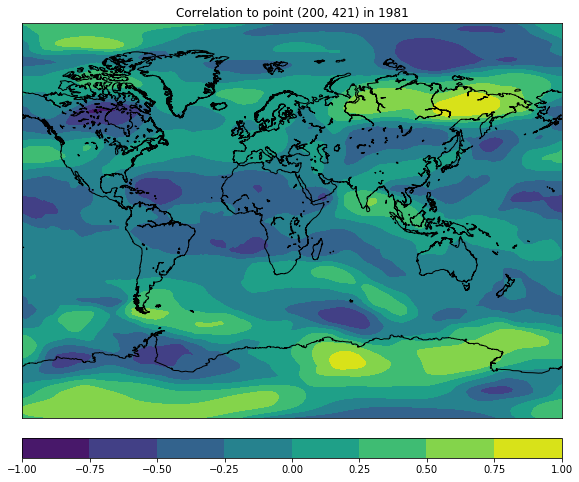

In [15]:
#Plot similarity on map
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, sim[:, :]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("Correlation to point ({}, {}) in 1981".format(lon, lat))
plt.show()